In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, metrics, preprocessing
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

house = pd.read_csv("assets/housedata.csv")
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [2]:
house2 = house.copy()

for col in house2.columns:
    if (house2[col].dtype == 'object'):
        house2[col] = OrdinalEncoder().fit_transform(house[[col]])
    else:
        house2[col] = preprocessing.StandardScaler().fit_transform(house[[col]])

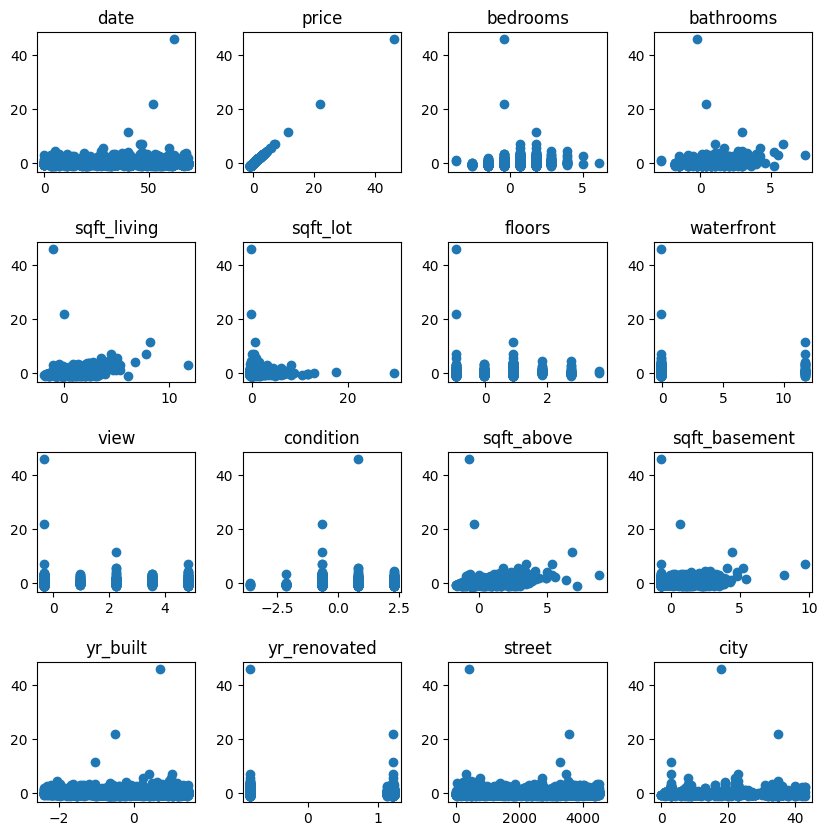

In [4]:
x_train = house2.to_numpy()
v = 0

fig, axs = plt.subplots(4, 4, figsize=(10,10))

for i in range(4):
    for j in range(4):
        axs[i, j].scatter(x_train[:,v], x_train[:,1])
        axs[i, j].set_title(house2.columns[v])
        #axs[i, j].set_ylim(0, 5e6)
        v += 1

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

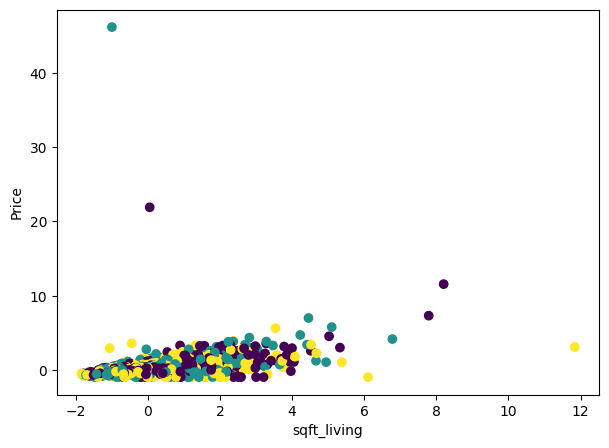

In [20]:
X = house2.to_numpy()
y = X[:, 1]

kmeans = cluster.KMeans(n_clusters=3, n_init=10);
kmeans.fit(X);
labels = kmeans.predict(X);

fig, ax = plt.subplots(figsize=(7,5))

# Ploteamos las últimas dos columnas
ax.scatter(X[:, 4], y, c=labels)
ax.set_xlabel('sqft_living')
ax.set_ylabel('Price')
#ax.set_ylim(0, 0.5e7)

plt.show()

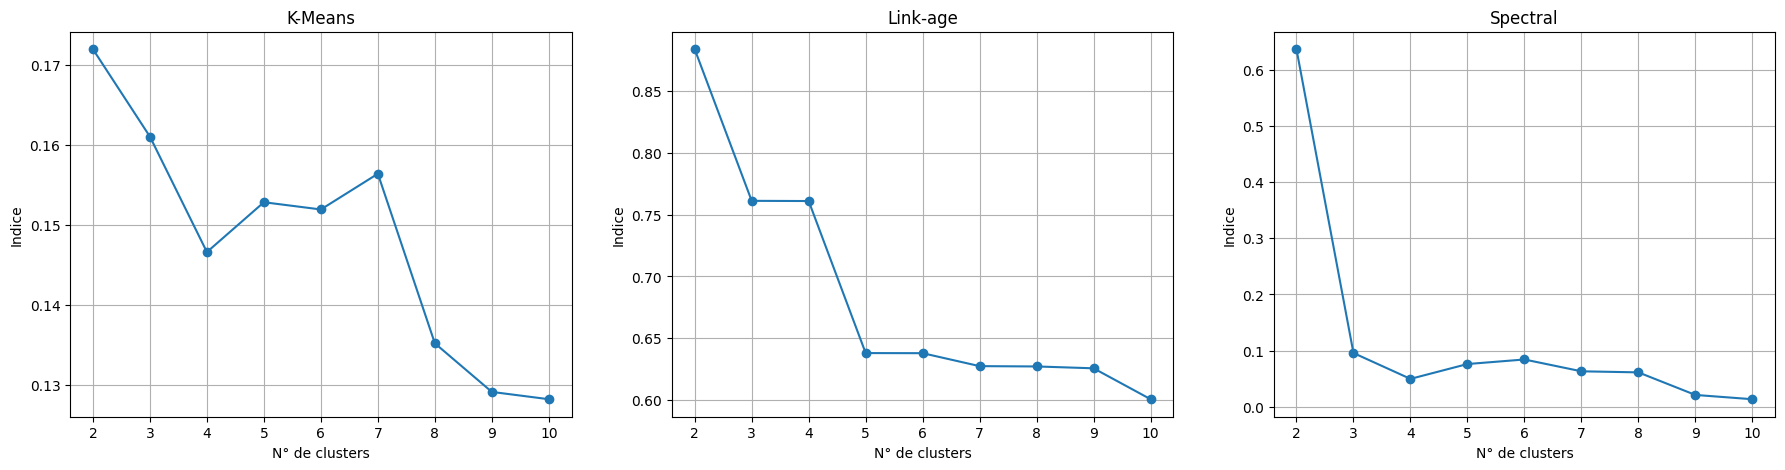

In [15]:
closter_x = []
y_value = []
y_link_value = []
y_spectral_value = []
X = preprocessing.StandardScaler().fit_transform(x_train)

for k in range(2, 11):
  k_means = cluster.KMeans(n_clusters=k, n_init=10)
  link_means = cluster.AgglomerativeClustering(linkage='single', n_clusters=k)
  spectral_means = cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
  y_pred = k_means.fit_predict(X)
  y_link_pred = link_means.fit_predict(X)
  y_spectral_pred = spectral_means.fit_predict(X)
  closter_x.append(k)
  y_value.append(metrics.silhouette_score(X, y_pred))
  y_link_value.append(metrics.silhouette_score(X, y_link_pred))
  y_spectral_value.append(metrics.silhouette_score(X, y_spectral_pred))

fig, (ax, ax2, ax3) = plt.subplots(ncols=3, figsize = (22, 5))

ax.plot(closter_x, y_value, 'o-')
ax.grid(True)
ax.set_xlabel('N° de clusters')
ax.set_ylabel('Indice')
ax.set_title('K-Means');

ax2.plot(closter_x, y_link_value, 'o-')
ax2.grid(True)
ax2.set_xlabel('N° de clusters')
ax2.set_ylabel('Indice')
ax2.set_title('Link-age');

ax3.plot(closter_x, y_spectral_value, 'o-')
ax3.grid(True)
ax3.set_xlabel('N° de clusters')
ax3.set_ylabel('Indice')
ax3.set_title('Spectral');

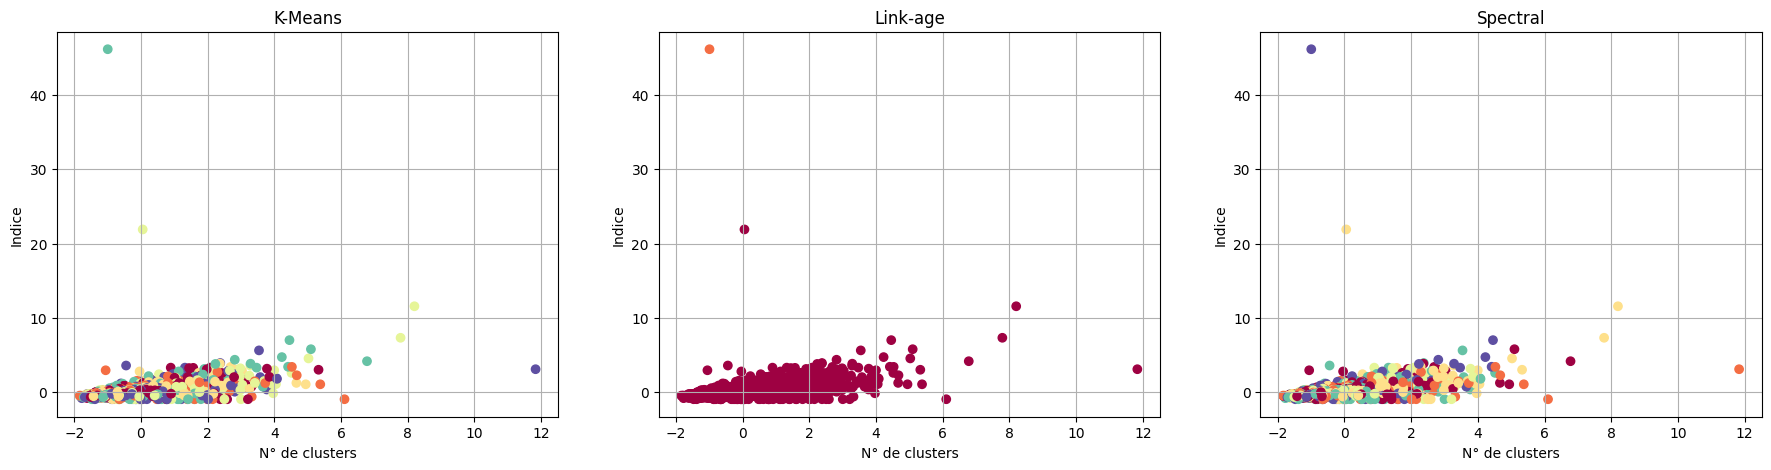

In [21]:
k = 6  # Debido principalmente a las gráficas K-Elbow

k_means = cluster.KMeans(n_clusters=k, n_init=10)
y_pred1 = k_means.fit_predict(X)
s1 = metrics.silhouette_score(X, y_pred1)

single_linkage = cluster.AgglomerativeClustering(linkage="single", n_clusters=k)
y_pred2 = single_linkage.fit_predict(X)
s2 = metrics.silhouette_score(X, y_pred2)

spectral = cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
y_pred3 = spectral.fit_predict(X)
s3 = metrics.silhouette_score(X, y_pred3)

fig, (ax, ax2, ax3) = plt.subplots(ncols=3, figsize = (22, 5))

ax.scatter(X[:, 4], X[:, 1], c=y_pred1, cmap=plt.cm.Spectral)
ax.grid(True)
ax.set_xlabel('N° de clusters')
ax.set_ylabel('Indice')
ax.set_title('K-Means');

ax2.scatter(X[:, 4], X[:, 1], c=y_pred2, cmap=plt.cm.Spectral)
ax2.grid(True)
ax2.set_xlabel('N° de clusters')
ax2.set_ylabel('Indice')
ax2.set_title('Link-age');

ax3.scatter(X[:, 4], X[:, 1], c=y_pred3, cmap=plt.cm.Spectral)
ax3.grid(True)
ax3.set_xlabel('N° de clusters')
ax3.set_ylabel('Indice')
ax3.set_title('Spectral');

house2['label'] = y_pred1

In [22]:
grouped = pd.DataFrame() #Inicializar un dataframe vacío
# Añadir una columna para poner el nombre de las variables en cada fila
grouped['Features'] = house.columns[:-1]
house['label'] = y_pred1
group = house.groupby('label')

for g in range(k):
    row = []
    df = group.get_group(g)
    for col in grouped['Features']:
        if df[col].dtype != 'object':
            row.append(np.round(df[col].mean(),2))
        else:
            row.append(df[col].value_counts().keys()[0])
    grouped['Group'+str(g)] = row

grouped

,Features,Group0,Group1,Group2,Group3,Group4,Group5
0,date,2014-06-25 00:00:00,2014-06-23 00:00:00,2014-07-08 00:00:00,2014-06-12 00:00:00,2014-05-21 00:00:00,2014-07-08 00:00:00
1,price,579516.52,523218.88,534125.6,602645.73,557444.24,516517.85
2,bedrooms,3.32,3.44,3.47,3.4,3.4,3.37
3,bathrooms,2.12,2.24,2.16,2.17,2.1,2.17
4,sqft_living,2083.77,2205.18,2167.12,2161.63,2061.01,2155.67
5,sqft_lot,10326.32,18665.76,17502.91,13534.96,11470.27,17447.31
6,floors,1.56,1.55,1.45,1.51,1.47,1.53
7,waterfront,0.01,0.0,0.0,0.01,0.01,0.01
8,view,0.25,0.18,0.17,0.35,0.18,0.32
9,condition,3.47,3.39,3.5,3.46,3.47,3.42


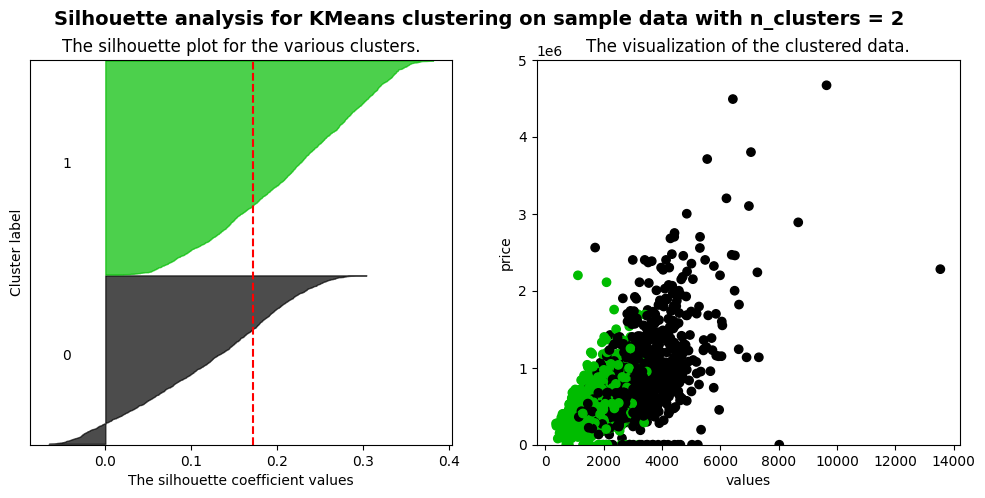

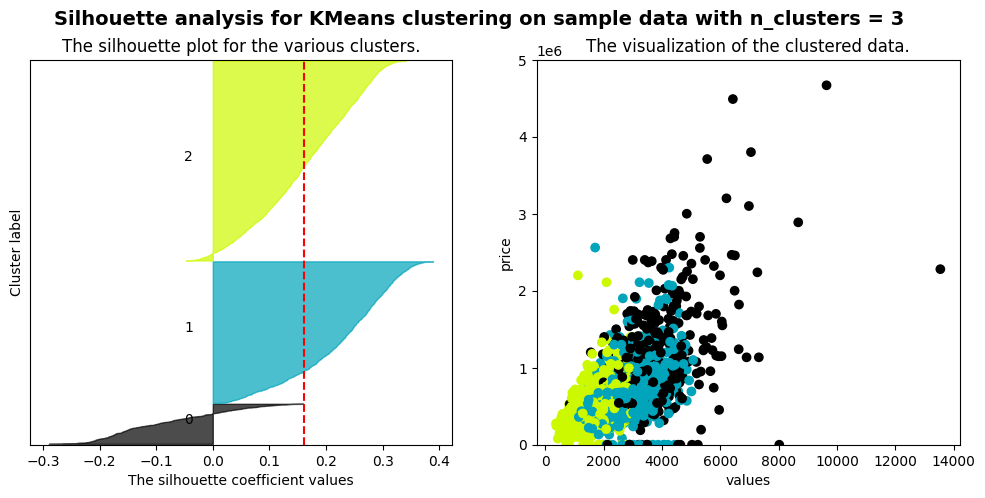

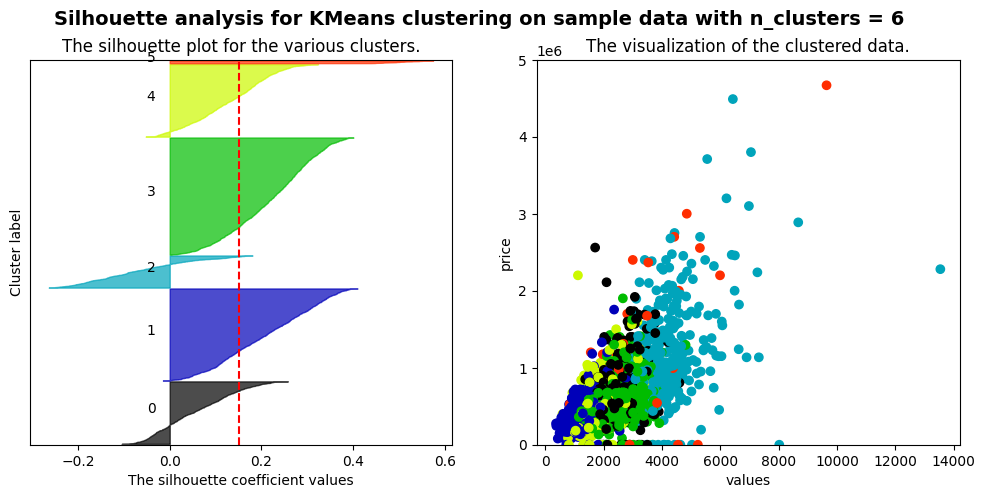

In [108]:
X = preprocessing.StandardScaler().fit_transform(x_train)
y = x_train[:, 1]
sfv = x_train[:, 4]

for k in [2, 3, 6]:
  fig, (ax0, ax1) = plt.subplots(1, 2)
  fig.set_size_inches(12, 5)
  # The (k+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax0.set_ylim([0, len(X) + (k + 1) * 10])
  k_means = cluster.KMeans(n_clusters=k, n_init=10)
  y_pred = k_means.fit_predict(X)
  silhouette_avg = metrics.silhouette_score(X, y_pred)
  sample_silhouette_values = metrics.silhouette_samples(X, y_pred)
  y_lower = 10
  for i in range(k):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    ax0.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax0.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
  ax0.set_title("The silhouette plot for the various clusters.")
  ax0.set_xlabel("The silhouette coefficient values")
  ax0.set_ylabel("Cluster label")
  ax0.set_yticks([])  # Clear the yaxis labels / ticks
  # The vertical line for average silhouette score of all the values
  ax0.axvline(x=silhouette_avg, color="red", linestyle="--")
  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(y_pred.astype(float) / k)
  ax1.scatter(sfv,y, c=colors)
  ax1.set_ylim(0, 0.5e7)
  ax1.set_title("The visualization of the clustered data.")
  ax1.set_xlabel('values')
  ax1.set_ylabel('price')
  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % k),
                fontsize=14, fontweight='bold')
plt.show()

In [109]:
df = house.iloc[:, 1:12]
std = preprocessing.StandardScaler().set_output(transform='pandas')
std.fit(df)
df = std.transform(df)
df = pd.concat([df, house['label']], axis=1)
#mdf = pd.melt(pd.concat([house.iloc[:, 1:3], house['label']], axis=1), id_vars=['label'], var_name=['details'])
mdf = pd.melt(df, id_vars=['label'], var_name=['details'])
mdf.head()

,label,details,value
0,5,price,-0.423864
1,2,price,3.249598
2,5,price,-0.372424
3,5,price,-0.234071
4,0,price,-0.003482


<Axes: xlabel='label', ylabel='value'>

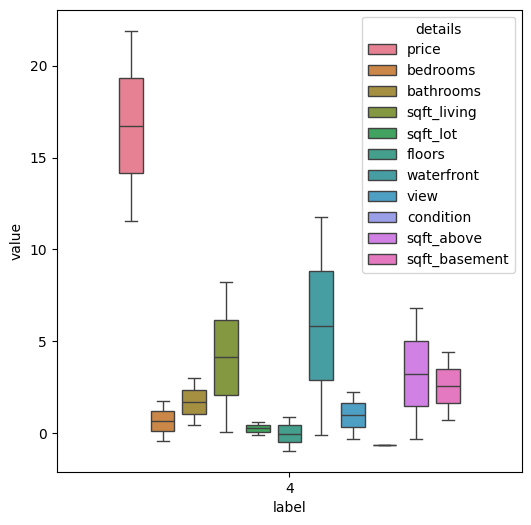

In [110]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(x="label", hue="details", y="value", data=mdf.loc[mdf['label'] == 4], ax=ax, width=.75, gap=0.25)

C:\Users\PC\AppData\Local\Temp\ipykernel_17640\4088675388.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


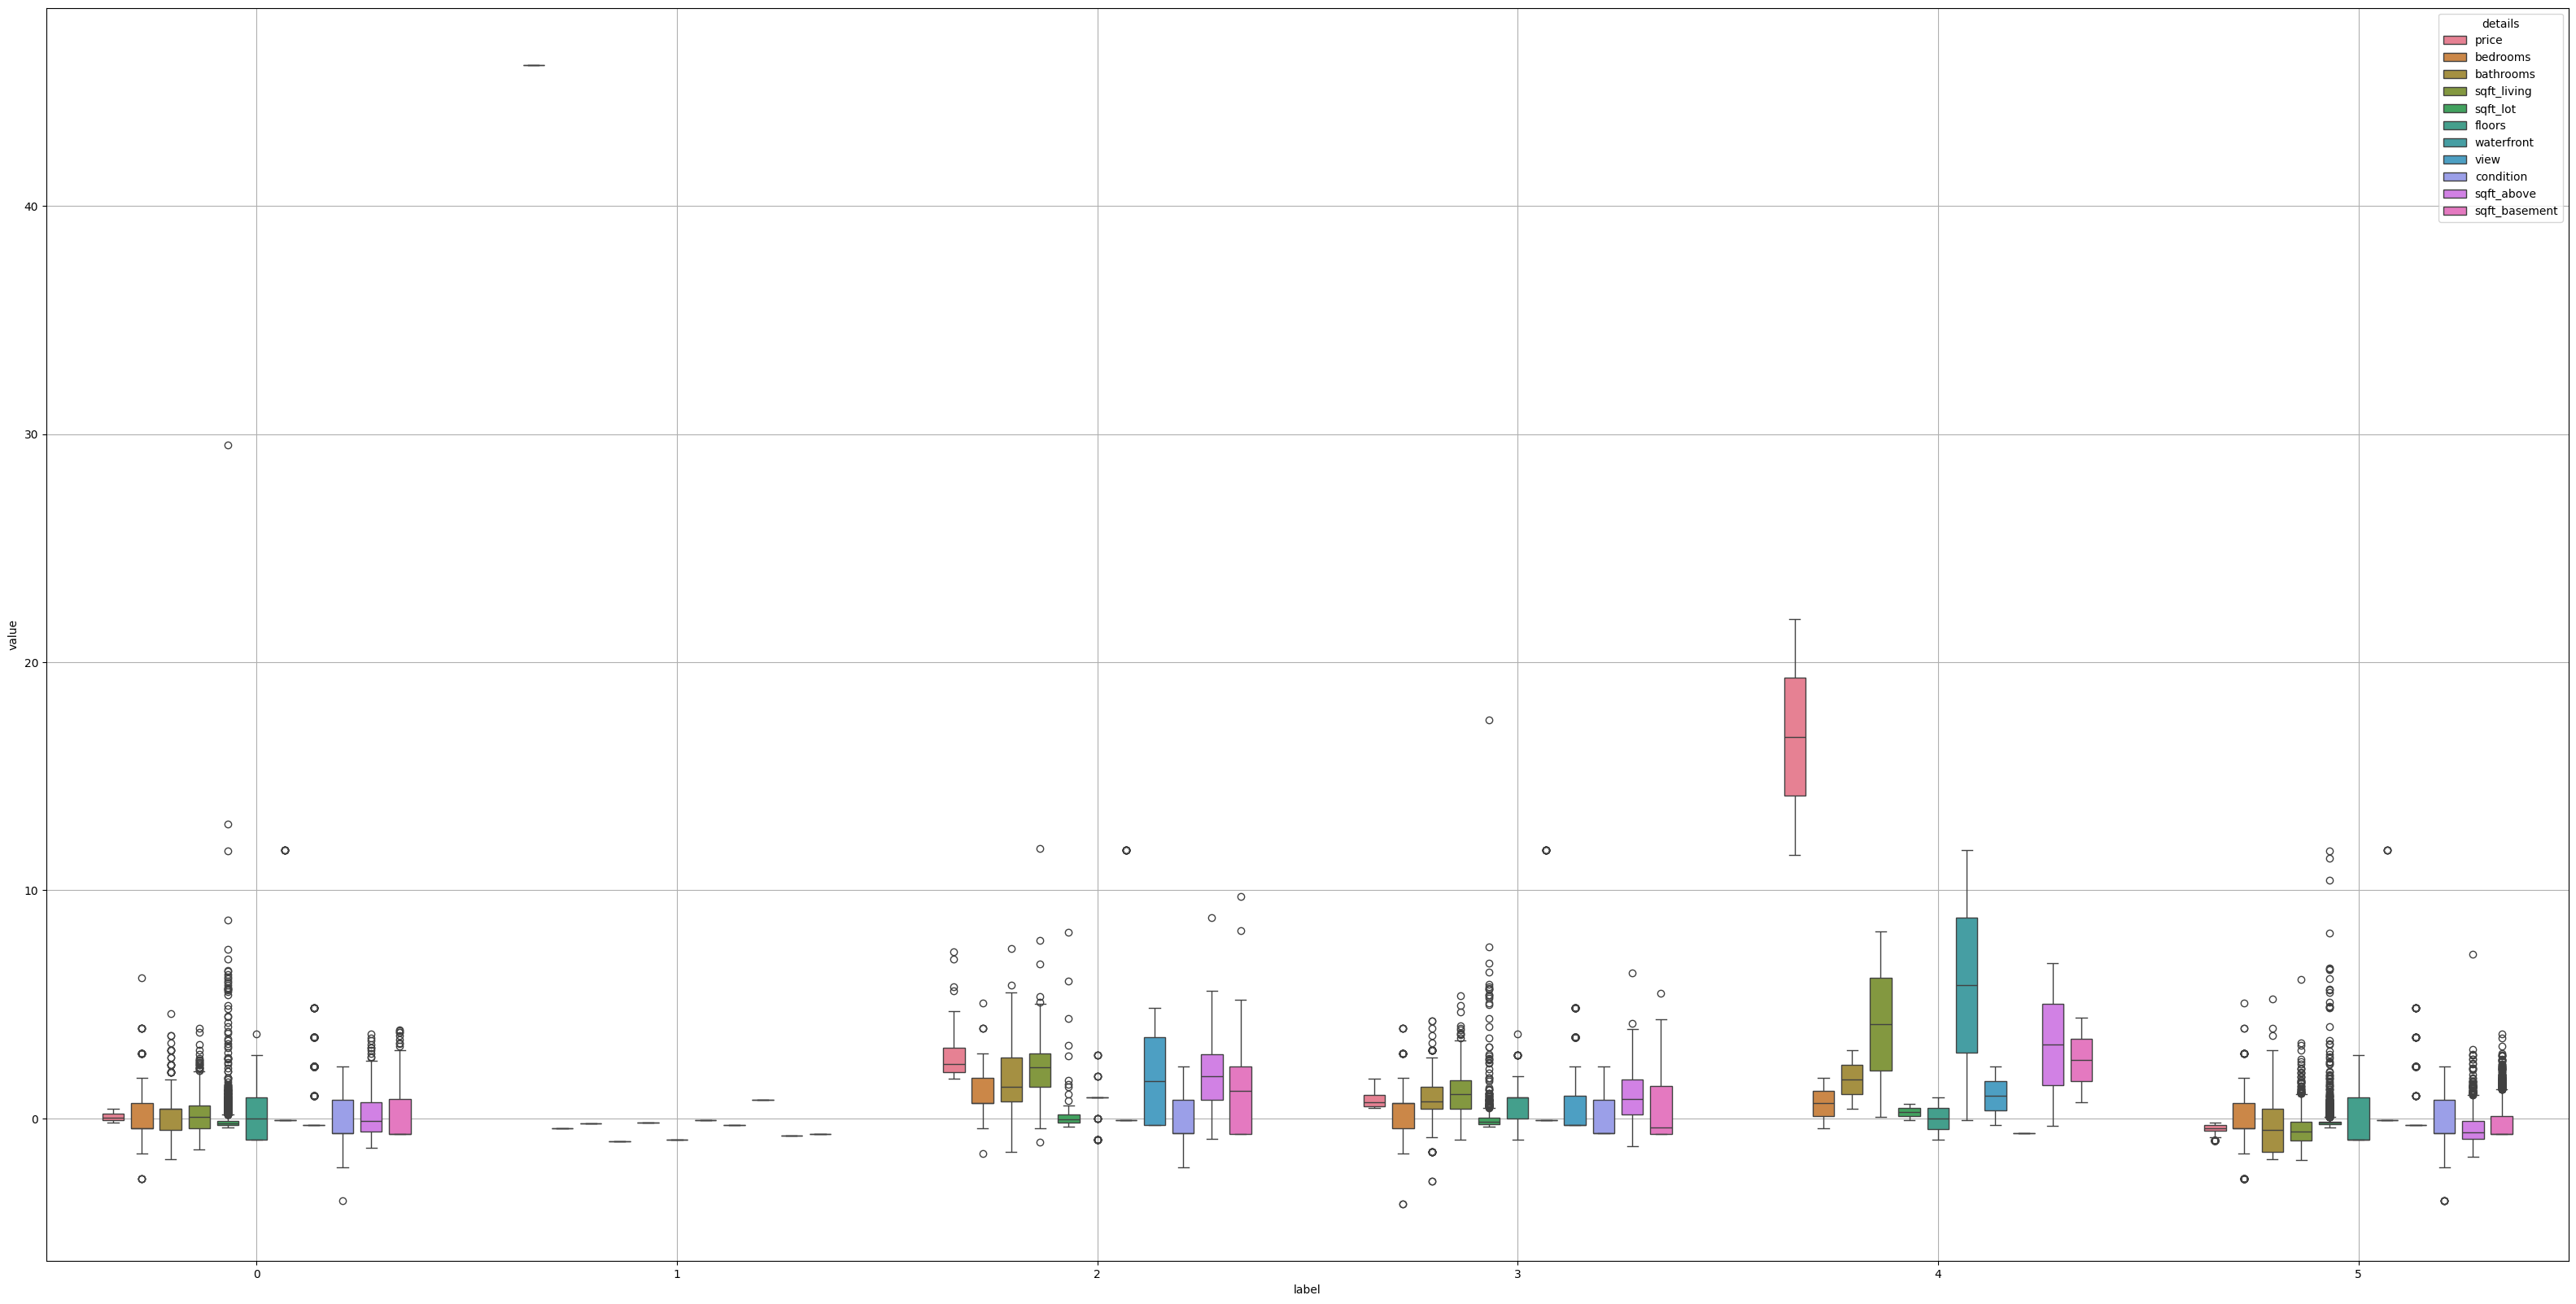

In [111]:
#mdf = pd.melt(pd.concat([house.iloc[:, 1:3], house['label']], axis=1), id_vars=['label'], var_name=['details'])
fig, ax = plt.subplots(figsize=(40, 20))
sns.boxplot(x="label", hue="details", y="value", data=mdf, ax=ax, width=.75, gap=0.25)
ax.grid(True)

fig.show()
#sns.boxplot(house, x=['price'], hue='label')

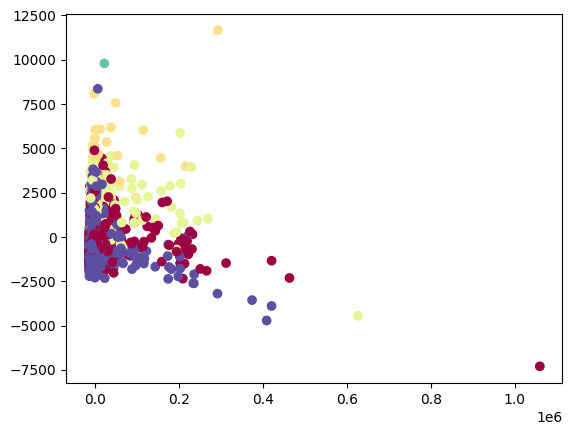

In [112]:
X2 = PCA(2).fit_transform(house.iloc[:, 2:12])

plt.scatter(X2[:, 0], X2[:, 1], c=y_pred1, cmap=plt.cm.Spectral);

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 4600
[t-SNE] Computed conditional probabilities for sample 2000 / 4600
[t-SNE] Computed conditional probabilities for sample 3000 / 4600
[t-SNE] Computed conditional probabilities for sample 4000 / 4600
[t-SNE] Computed conditional probabilities for sample 4600 / 4600
[t-SNE] Mean sigma: 260.360307
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.019162
[t-SNE] KL divergence after 1000 iterations: 0.727120


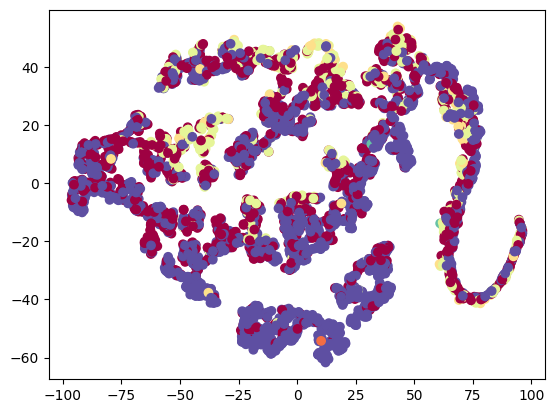

In [113]:
tsne = TSNE(n_components=2, init='pca', random_state=0, method='exact', verbose=1).fit_transform(house.iloc[:, 2:12])

plt.scatter(tsne[:, 0], tsne[:, 1], c=y_pred1, cmap=plt.cm.Spectral);